# 指標応答行列を用いた手法

\begin{align*}
    \hat{\mathbf{Y}} = \mathbf{X} (\mathbf{X}^T \mathbf{X})^{-1} \mathbf{X}^T \mathbf{Y}
\end{align*}

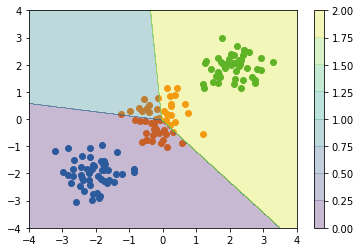

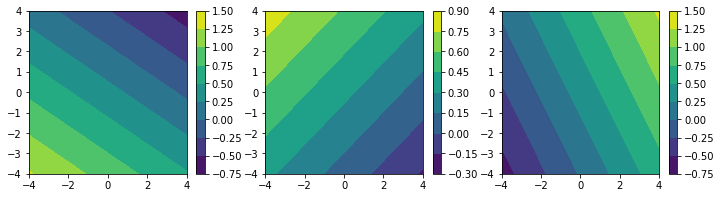

In [2]:
import numpy as np
import matplotlib.pyplot as plt;

N = 50;
dim = 2;
K = 3;

fig = plt.figure ();

# create data
mu = np.array ([[-2, 0, 2], [-2, 0, 2]]);
Sigma = np.array (([0.5,0],[0,0.5]));
X = np.zeros ((dim, N, K));
for k in range (K):
    tmp = Sigma.dot (np.random.randn (dim,N)) + mu[:,k].reshape (dim,1);
    X[:,:,k] = tmp;
    plt.scatter (X[0,:,k], X[1,:,k]);


# predict
X2 = np.r_[np.ones((1,K*N)), np.c_[X[:,:,0],X[:,:,1],X[:,:,2]]].T;
tvec = np.r_[np.array ([0]*N), np.array([1]*N), np.array ([2]*N)]
Y = np.eye (K)[tvec];

B = np.linalg.inv (X2.T.dot (X2)).dot (X2.T).dot (Y);

numl = 800;
x0=np.linspace (-4, 4, numl);
x1=np.linspace (-4, 4, numl);
xv0, xv1 = np.meshgrid (x0,x1);
xv0_flatten = xv0.flatten ().reshape (numl*numl,1);
xv1_flatten = xv1.flatten ().reshape (numl*numl,1);
xv_enlarged = np.c_[np.ones ((numl*numl,1)), xv0_flatten, xv1_flatten];
y_pred = xv_enlarged.dot (B);
ax = plt.gca ();
surf = ax.contourf (xv0, xv1, np.argmax (y_pred, axis=1).reshape (numl,numl), alpha=0.3);
fig.colorbar (surf);


fig = plt.figure (figsize=(12,3));
ax = fig.add_subplot (131);
surf = ax.contourf (xv0, xv1, y_pred[:,0].reshape (numl,numl));
fig.colorbar (surf);

ax = fig.add_subplot (132);
surf = ax.contourf (xv0, xv1, y_pred[:,1].reshape (numl,numl));
fig.colorbar (surf);
ax = fig.add_subplot (133);
surf = ax.contourf (xv0, xv1, y_pred[:,2].reshape (numl,numl));
fig.colorbar (surf);